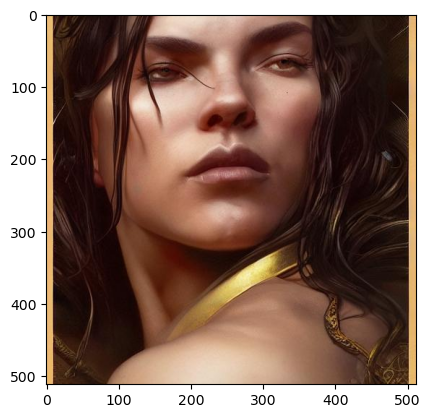

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

DATADIR = "C:\\Users\\georg\\Datasets\\kaggleartdataset"

Categories = ["AiArtData","RealArt"]

for category in Categories:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))    
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()

        break
    break
        
    


In [2]:
print(img_array)

[[[113 186 230]
  [117 185 230]
  [122 184 230]
  ...
  [115 186 230]
  [117 183 231]
  [119 183 231]]

 [[115 188 232]
  [119 187 232]
  [123 185 231]
  ...
  [112 183 227]
  [116 182 230]
  [118 182 230]]

 [[115 190 234]
  [119 190 234]
  [124 186 232]
  ...
  [116 184 231]
  [119 183 231]
  [122 184 232]]

 ...

 [[124 182 234]
  [119 182 233]
  [113 181 234]
  ...
  [111 184 234]
  [118 184 235]
  [119 184 235]]

 [[124 182 234]
  [119 182 233]
  [113 181 234]
  ...
  [113 186 236]
  [120 186 237]
  [121 186 237]]

 [[124 182 234]
  [119 182 233]
  [115 181 234]
  ...
  [115 188 238]
  [122 188 239]
  [124 189 240]]]


In [3]:
print(img_array.shape)

(512, 512, 3)


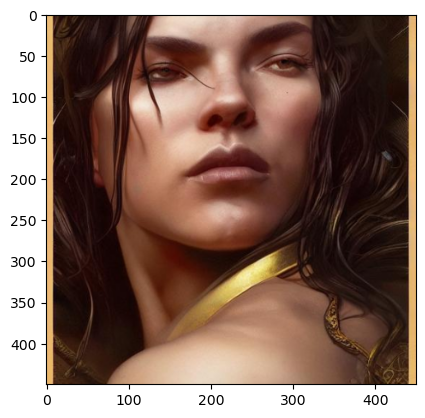

In [4]:
NEW_SIZE = 450

new_array = cv2.resize(img_array, (NEW_SIZE, NEW_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in Categories:
        path = os.path.join(DATADIR, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                resized_array = cv2.resize(img_array, (NEW_SIZE, NEW_SIZE))
                new_array = cv2.cvtColor(resized_array, cv2.COLOR_BGR2RGB)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

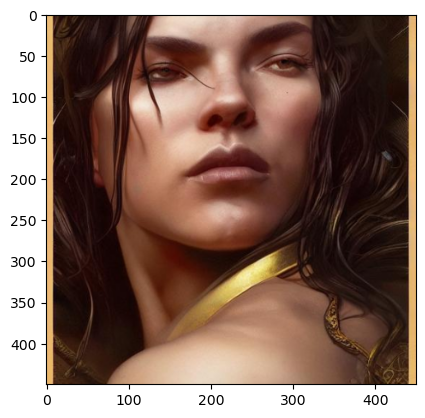

Label = AiArtData
15000


In [6]:
plt.imshow(training_data[0][0])
plt.show()
test = training_data[0][1]
label = Categories[test]
print(f"Label = {label}")
print(len(training_data))

In [7]:
import random

random.shuffle(training_data)

In [8]:
for img in training_data[:10]:
    print(img[1])

0
1
1
0
1
1
0
0
0
0


In [9]:
x_train = [] # features
y_train = [] # labels

In [10]:
for feature, label in training_data:
    x_train.append(feature)
    y_train.append(label)

x_train = np.array(x_train).reshape(-1, NEW_SIZE, NEW_SIZE, 3)

In [11]:
import pickle

pickle_out = open("X_train.pickle", "wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X_train.pickle", "rb")
x_train = pickle.load(pickle_in)

In [13]:
x_train[0]

array([[[238, 238, 240],
        [238, 238, 240],
        [238, 238, 240],
        ...,
        [234, 233, 231],
        [234, 233, 231],
        [234, 233, 231]],

       [[238, 238, 240],
        [238, 238, 240],
        [238, 238, 240],
        ...,
        [234, 233, 231],
        [234, 233, 231],
        [234, 233, 231]],

       [[238, 238, 240],
        [238, 238, 240],
        [238, 238, 240],
        ...,
        [233, 233, 231],
        [234, 233, 231],
        [234, 233, 231]],

       ...,

       [[242, 244, 243],
        [242, 244, 243],
        [242, 244, 243],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[242, 244, 243],
        [242, 244, 243],
        [242, 244, 243],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[242, 244, 243],
        [242, 244, 243],
        [242, 244, 243],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]]